In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/airquality/AirQualityUCI.xlsx


In [24]:
"""

Dependent Variables or Output : (CO, Non-Methan Hydrocarbons, Benzene [C6H6], NOx, NO2)

"""

'\n\nDependent Variables or Output : (CO, Non-Methan Hydrocarbons, Benzene [C6H6], NOx, NO2)\n\n'

In [25]:
"""
Configuration BLock
-------------------
Place any constants and variables here
"""

DATA_PATH = "/kaggle/input/airquality/AirQualityUCI.xlsx"
NO_DATA = -200

In [26]:
# All library, tools and module imports to be done in this block

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.stats import skew, uniform


In [27]:
# Loading the dataset from XLSX

df = pd.read_excel(DATA_PATH,  parse_dates={'datetime': ['Date', 'Time']})


In [28]:
# Describe each column in the dataset, in terms of statistics
df.describe()

,datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 16:00:00,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 18:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 05:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 16:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 03:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 14:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [29]:
df.head()

,datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [30]:
print("Output from df.info")
df.info()

Output from df.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory u

In [31]:
dShape = df.shape
print("Rows : " + str(dShape[0]))
print("Columns : " + str(dShape[1]))

Rows : 9357
Columns : 14


In [32]:
cols = df.columns
print(cols)

Index(['datetime', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [33]:
"""
Lets analyze the number of missing values

In this dataset, empty values are represented with -200 

"""

emptyByCols = {}
def resetECB():
  global emptyByCols
  for col in cols:
    emptyByCols[col] = 0

resetECB()

def findMissingCels(row):
  global emptyByCols
  for col in cols:
    if col != "datetime" and row[col] == NO_DATA:
      emptyByCols[col] += 1 

df.apply(findMissingCels, axis=1)

for key,value in emptyByCols.items():
  print(key + " : " + str(value))

datetime : 0
CO(GT) : 1683
PT08.S1(CO) : 366
NMHC(GT) : 8443
C6H6(GT) : 366
PT08.S2(NMHC) : 366
NOx(GT) : 1639
PT08.S3(NOx) : 366
NO2(GT) : 1642
PT08.S4(NO2) : 366
PT08.S5(O3) : 366
T : 366
RH : 366
AH : 366


In [34]:
"""
We can see that there are 8443 cells empty out of 9357 cells for NMHC(GT)
"""
df.drop('NMHC(GT)', axis=1, inplace=True)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df.drop(["datetime"], axis=1, inplace=True)

In [35]:
#Updates columns
cols = df.columns
print(cols)

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [36]:
def changeToNA(row):
  for col in cols:
    if row[col] == NO_DATA:
      row[col] = np.nan
  return row

df = df.apply(changeToNA, axis = 1)

df = df.dropna(axis=0)

df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,hour
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.00000,6941.000000,6941.000000
mean,2.182467,1119.786222,10.554411,958.421925,250.656476,816.771659,113.858608,1452.528598,1057.631753,17.753280,48.880121,0.985573,2004.280939,6.02723,15.996686,12.020170
std,1.441158,218.739106,7.465170,264.052415,208.603978,251.896825,47.464705,353.297883,406.505668,8.845398,17.432652,0.401097,0.449490,3.48971,8.708181,6.813924
min,0.100000,647.250000,0.181525,390.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,2004.000000,1.00000,1.000000,0.000000
25%,1.100000,956.250000,4.927071,759.750000,103.000000,642.250000,79.000000,1206.500000,759.500000,11.200000,35.325001,0.694123,2004.000000,3.00000,9.000000,7.000000
50%,1.900000,1084.750000,8.788282,931.000000,186.000000,785.500000,110.000000,1457.000000,1006.250000,16.850000,49.175000,0.953910,2004.000000,6.00000,16.000000,12.000000
75%,2.900000,1254.000000,14.579057,1135.250000,334.600000,946.500000,142.000000,1683.000000,1322.000000,23.724999,62.224999,1.251552,2005.000000,9.00000,24.000000,18.000000
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.180639,2005.000000,12.00000,31.000000,23.000000


In [37]:
df.shape

(6941, 16)

In [38]:
# Find number of uniques in each column
uniDF = {
    "Column" : [],
    "%Uniques" : []
}
for col in cols[1:]:
    uniDF["Column"].append(col)
    uniDF["%Uniques"].append((df[col].nunique() / (df.shape[0])) * 100.0)
    
uniDF = pd.DataFrame(uniDF)

uniDF
    

,Column,%Uniques
0,PT08.S1(CO),43.048552
1,C6H6(GT),49.258032
2,PT08.S2(NMHC),49.258032
3,NOx(GT),33.266100
4,PT08.S3(NOx),45.036738
5,NO2(GT),19.118283
6,PT08.S4(NO2),56.504826
7,PT08.S5(O3),59.443884
8,T,43.307881
9,RH,61.244777


In [39]:
# Validate that all missing value rows have been iradicated
resetECB()
df.apply(findMissingCels, axis=1)
print(emptyByCols)

{'datetime': 0, 'CO(GT)': 0, 'PT08.S1(CO)': 0, 'NMHC(GT)': 8443, 'C6H6(GT)': 0, 'PT08.S2(NMHC)': 0, 'NOx(GT)': 0, 'PT08.S3(NOx)': 0, 'NO2(GT)': 0, 'PT08.S4(NO2)': 0, 'PT08.S5(O3)': 0, 'T': 0, 'RH': 0, 'AH': 0, 'year': 0, 'month': 0, 'day': 0, 'hour': 0}


In [40]:
dShape = df.shape
print("Rows : " + str(dShape[0]))
print("Columns : " + str(dShape[1]))

Rows : 6941
Columns : 16


In [41]:
# more data exploration through visualizing
#plotting histograms of each category to idenitfy patterns in the data


df_skewness = df.apply(skew)

print(df_skewness)

CO(GT)           1.338861
PT08.S1(CO)      0.701396
C6H6(GT)         1.301414
PT08.S2(NMHC)    0.509721
NOx(GT)          1.643276
PT08.S3(NOx)     1.178926
NO2(GT)          0.583956
PT08.S4(NO2)     0.201727
PT08.S5(O3)      0.552003
T                0.398296
RH              -0.010521
AH               0.357700
year             0.974777
month            0.277256
day             -0.055648
hour            -0.118182
dtype: float64


We can see that RH, though negative, is very close to 0, therefore seems to be very close to being a unifiorm distribution
All other columns are positively skewed, so NO negatvely skewed distrbutions of any column

In [42]:
uni_dist = ['RH','day']
pos_skew = [col for col in cols if col not in uni_dist and col != "datetime"]

In [43]:
def plotHistogram(colName, position, msg, dataset, color = "red"):
    sns.histplot(data=dataset, x=colName,  color=color, ax=position)
    position.set_title(msg, pad=10)


# Uniform Distribution

# Poitively Skewed Distributions

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = df.columns
norm_df = scaler.fit_transform(df)
norm_df = pd.DataFrame(norm_df, columns = cols)

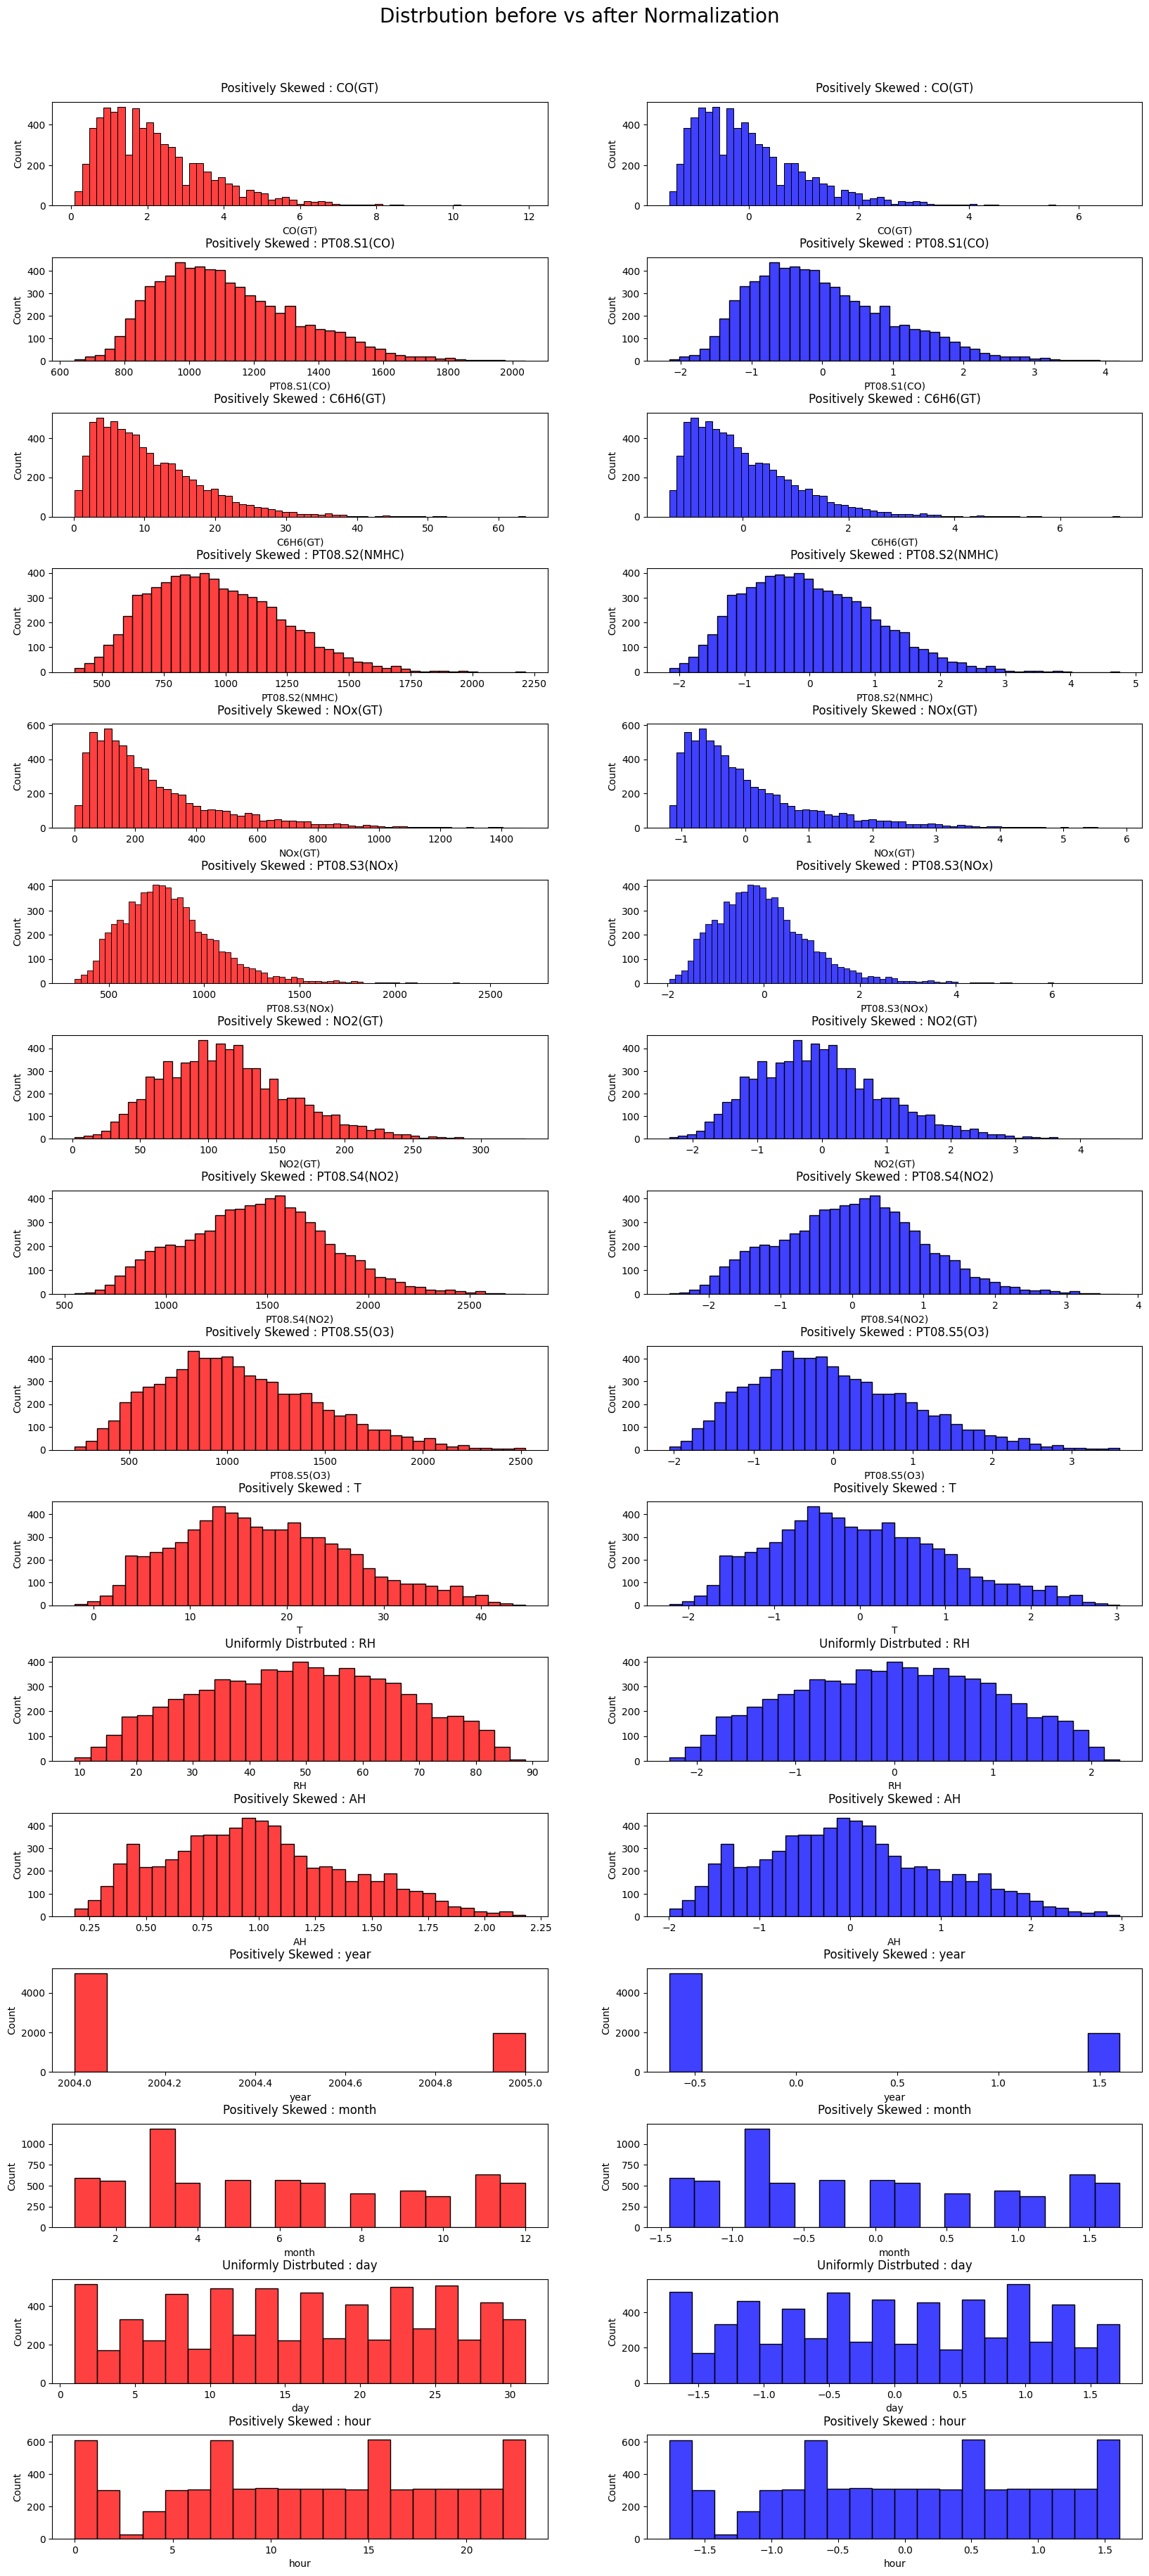

In [45]:
def plotHistComp(cols, title, df1, df2):
    fig, axes = plt.subplots(len(cols),2, figsize=(20, 45))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(title, fontsize=20, y=0.91)
    for row in range(len(cols)):
        if cols[row] in pos_skew:
            dist_str = "Positively Skewed"
        else:
            dist_str = "Uniformly Distrbuted"
        plotHistogram(cols[row], axes[row][0], "{} : {}".format(dist_str,cols[row]),df1)
        plotHistogram(cols[row], axes[row][1], "{} : {}".format(dist_str,cols[row]),df2, color="blue")


plotHistComp(df.columns,"Distrbution before vs after Normalization", df, norm_df)

In [82]:
from sklearn.model_selection import train_test_split

def getDataset(data, indep_val, dep_val, tsize = 0.3):
    X=data[indep_val]
    y=data[dep_val]
    # X_train, X_test, y_train, y_test
    return train_test_split(X, y, test_size=tsize)


In [86]:
dep_val = ['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']
indep_val = [c for c in df.columns if c not in dep_val]
ex1 = getDataset(df, indep_val, dep_val)
train_df = pd.concat([ex1[0], ex1[2]], axis=1)

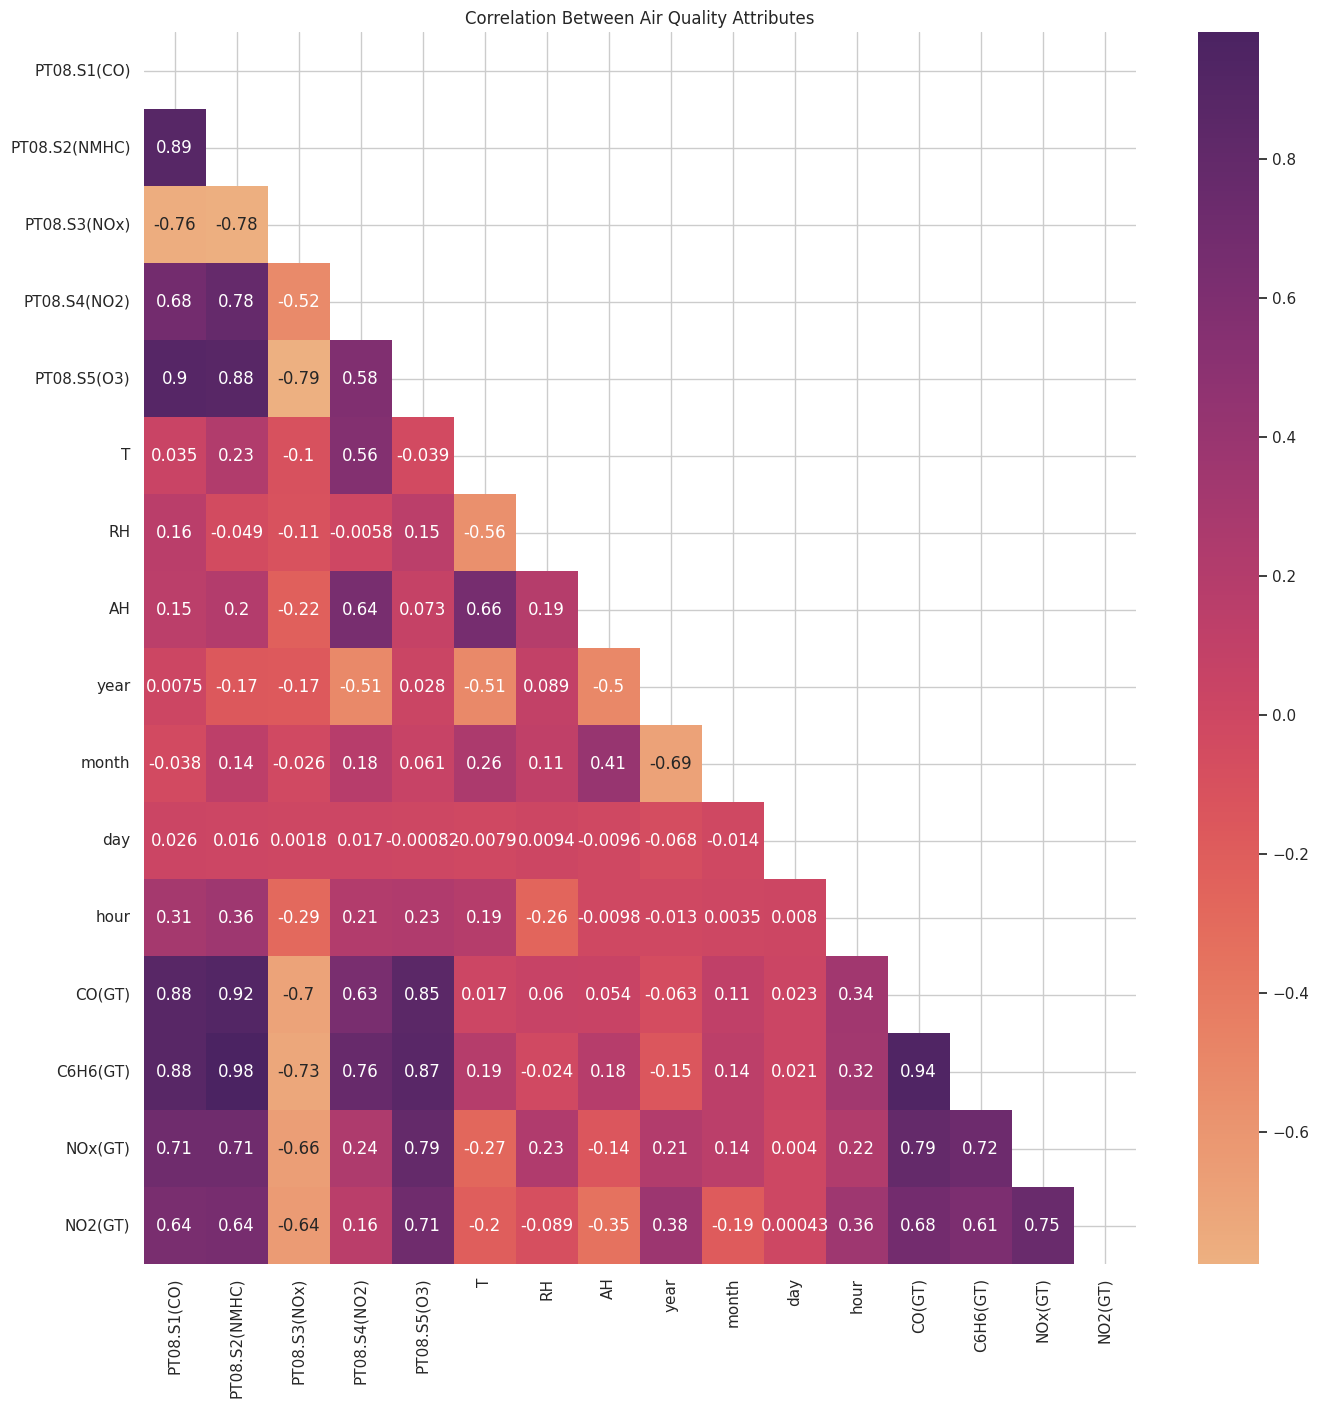

In [87]:
def displayHeatMap(dim1, dim2, title, df):
    fig=plt.figure(figsize=(dim1,dim2))
    plt.title(title)
    sns.heatmap(df, annot= True, cmap='flare')

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Apply the mask to the correlation matrix
lower_triangle_corr_matrix = corr.mask(mask)
displayHeatMap(df.shape[1],df.shape[1] , 'Correlation Between Air Quality Attributes', lower_triangle_corr_matrix)

In [370]:
def visualizeLineCharts(df, columns, x1, title):   
   
    fig = go.Figure([{ 'x': df[x1],
    'y': df[col],
    'name': col
    }  for col in columns], layout=go.Layout(title=go.layout.Title(text=title)))
    
    fig.show()

def visualizeScatter(df, x, y, fill, title):
    fig = px.scatter(df, 
    x=x, 
    y=y, 
    color=fill, 
    trendline='ols',
    #     facet_row=fill, 
    title=title)
    
    fig.show()

1. Day has no correlation with any other column
2. 

In [373]:
visualizeScatter(df, "PT08.S2(NMHC)", "PT08.S1(CO)", "C6H6(GT)" ,"Strong Positive Linear Relationship of C6H6(GT) with PT08.S2(NMHC), PT08.S1(CO)")

In [490]:
visualizeScatter(df, "PT08.S3(NOx)", "CO(GT)", "CO(GT)" ,"Strong Positive Linear Relationship of CO(GT) with PT08.S2(NMHC), PT08.S5(O3)")

In [ ]:
visualizeScatter(df, "PT08.S5(O3)", "PT08.S3(NOx)", "CO(GT)" ,"Strong Positive Linear Relationship of CO(GT) with PT08.S2(NMHC), PT08.S5(O3)")

In [392]:
# Model all pairwise relationships 16x15/2 = 

total_plots = (norm_df.shape[1]*(norm_df.shape[1]-1))/2;
fig, axes = plt.subplots(,3, figsize=(20, 45))


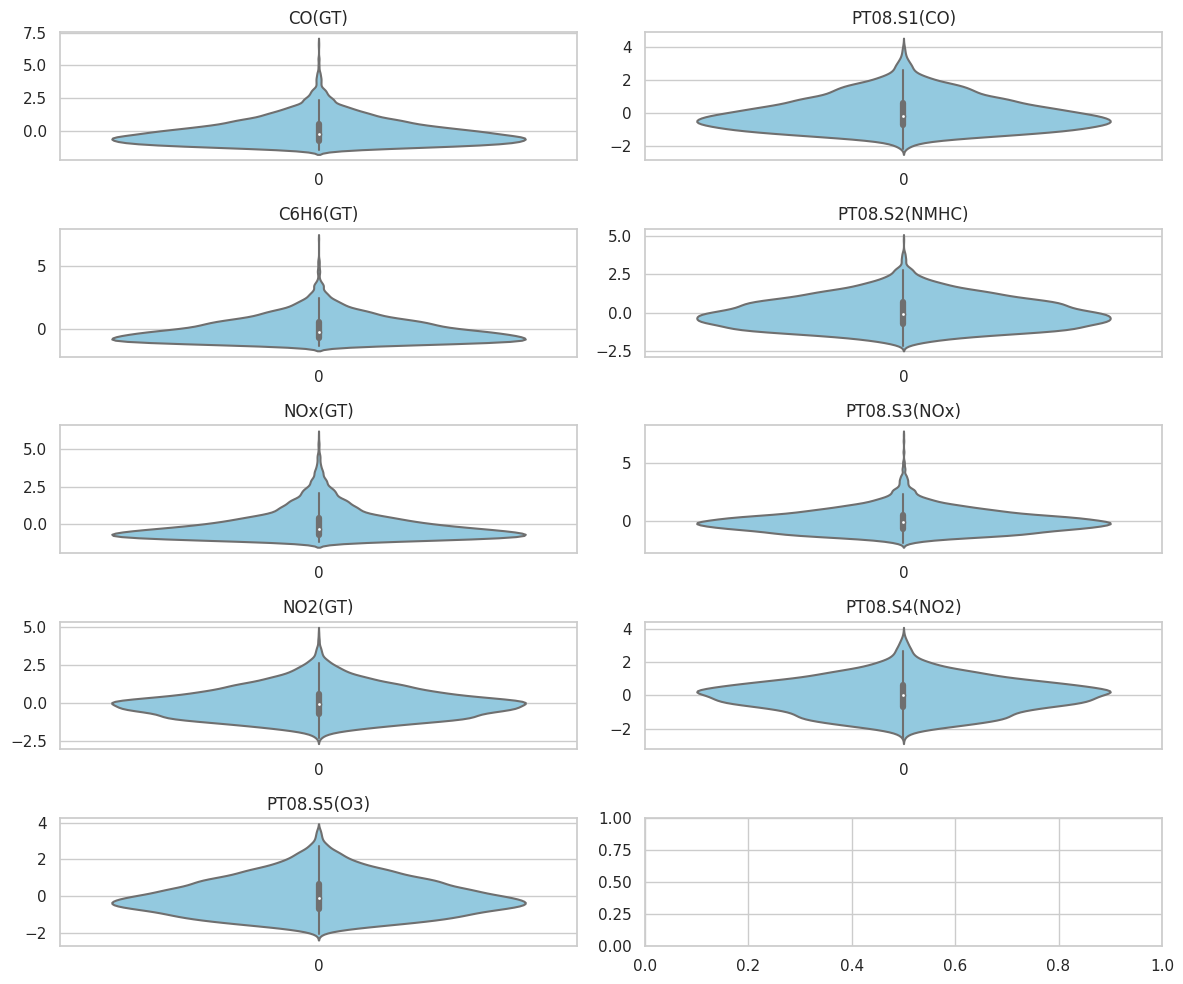

In [211]:
air_quality_cols = ['CO(GT)', 'PT08.S1(CO)','C6H6(GT)', 
                    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                    'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Plot violin plots for each air quality variable
fig, axes = plt.subplots(5,2,figsize=(12,10))
sns.set(style="whitegrid")
for i, col in enumerate(air_quality_cols, start=0):
    sns.violinplot(data=norm_df[col], color='skyblue', inner="box", showfliers=True, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_title(col)
    
plt.tight_layout()
plt.show()

In [253]:
def findWhiskers(col):
    q1 = norm_df[col].quantile(0.25)
    q3 = norm_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return [lower_whisker,upper_whisker]

filter_df = norm_df.copy()
for col in ["PT08.S3(NOx)"]:
    whiskers = findWhiskers(col)
    filter_df= filter_df[(filter_df[col] >= whiskers[0]) & (filter_df[col] <= whiskers[1])]


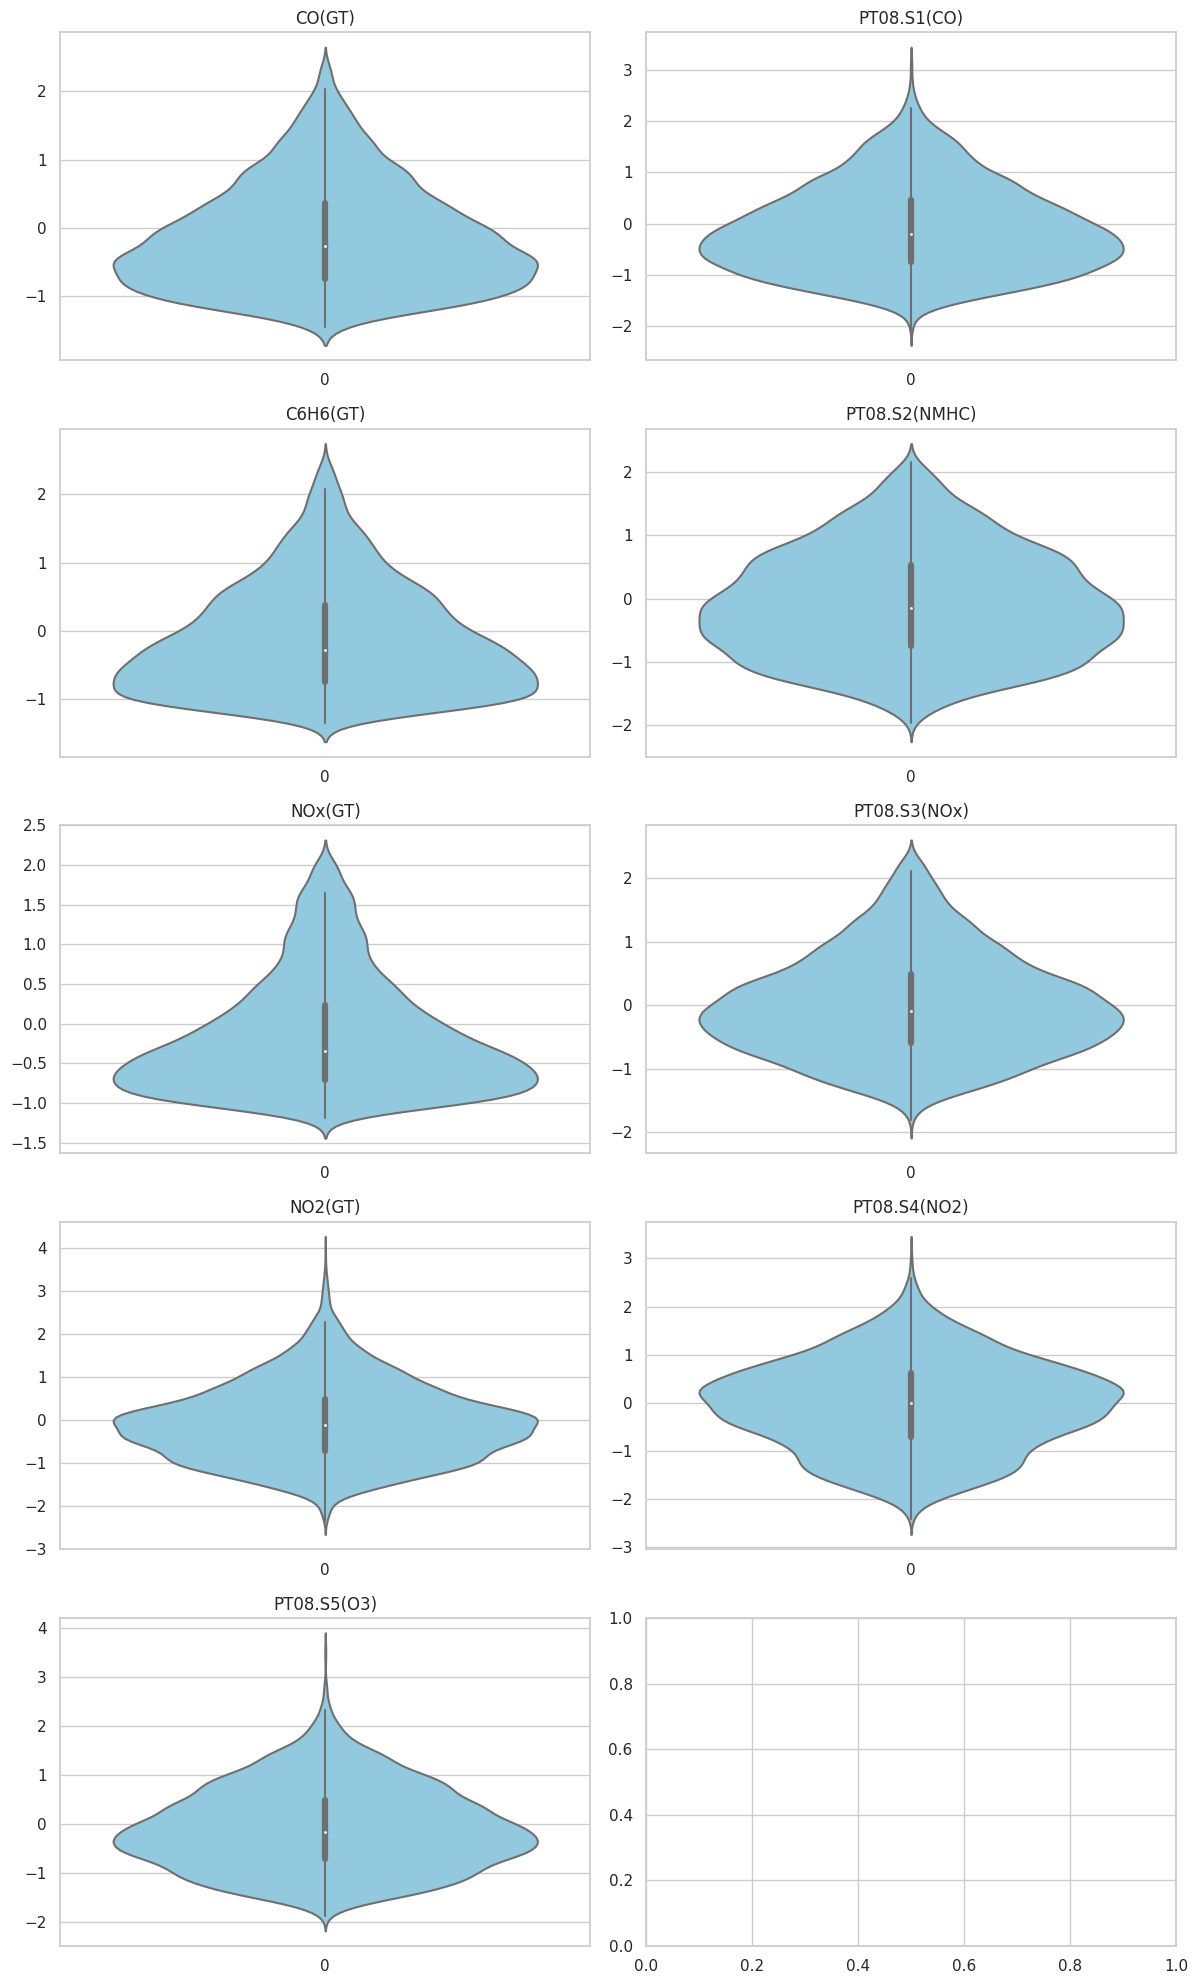

In [233]:
fig, axes = plt.subplots(5,2,figsize=(12,20))
sns.set(style="whitegrid")
for i, col in enumerate(air_quality_cols, start=0):
    sns.violinplot(data=filter_df[col], color='skyblue', inner="box", showfliers=True, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_title(col)
    
plt.tight_layout()
plt.show()

In [ ]:
filter_df.shape

In [221]:
from sklearn.linear_model import LinearRegression
def runLinearReg(X_train, X_test, y_train, y_test):    
    reg=LinearRegression()
    reg.fit(X_train, y_train)
    y_pred=reg.predict(X_test)
    from sklearn.metrics import r2_score
    print(r2_score(y_test,y_pred))

In [376]:
from sklearn.tree import DecisionTreeRegressor  
def runDecisionTreeReg(X_train, X_test, y_train, y_test):
    reg=DecisionTreeRegressor()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    from sklearn.metrics import r2_score
    print(r2_score(y_test,y_pred))


In [345]:
from sklearn.ensemble import RandomForestRegressor          
def runRFReg(X_train, X_test, y_train, y_test):
    reg=RandomForestRegressor()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    from sklearn.metrics import r2_score
    print(r2_score(y_test,y_pred))

In [378]:
from xgboost import XGBRegressor
def runXGB(X_train, X_test, y_train, y_test):
    xgb_model = XGBRegressor(objective='reg:squarederror')
    xgb_model.fit(X_train, y_train)
    predictions = xgb_model.predict(X_test)
    print(r2_score(y_test,predictions))

In [499]:
cpy_df = filter_df.copy()
cpy_df['CO2(GT)'] = np.log(cpy_df['CO(GT)'] + abs(cpy_df['CO(GT)'].min()) + 1)
cpy_df['C6H6(GT)'] = np.log(cpy_df['C6H6(GT)'] + abs(cpy_df['C6H6(GT)'].min()) + 1)
cpy_df['NOx(GT)'] = np.log(cpy_df['NOx(GT)'] + abs(cpy_df['NOx(GT)'].min()) + 1)


dep_val = ['CO(GT)','C6H6(GT)']

X_train, X_test, y_train, y_test= getDataset(cpy_df,
                                             [c for c in cpy_df.columns if c not in dep_val and c not in ["PT08.S2(NMHC)","PT08.S5(O3)"]],
                                             dep_val)

runLinearReg(X_train, X_test, y_train, y_test)
runRFReg(X_train, X_test, y_train, y_test)
runXGB(X_train, X_test, y_train, y_test)

0.9741710425136814
0.9825425127719584
0.9924655077069808


In [510]:
cpy_df = filter_df.copy()
cpy_df['CO2(GT)'] = np.log(cpy_df['CO(GT)'] + abs(cpy_df['CO(GT)'].min()) + 1)
cpy_df['C6H6(GT)'] = np.log(cpy_df['C6H6(GT)'] + abs(cpy_df['C6H6(GT)'].min()) + 1)
cpy_df['NOx(GT)'] = np.log(cpy_df['NOx(GT)'] + abs(cpy_df['NOx(GT)'].min()) + 1)

dep_val = ['NOx(GT)']
X_train, X_test, y_train, y_test= getDataset(cpy_df,
                                             [c for c in cpy_df.columns if c not in dep_val and c not in ["PT08.S2(NMHC)","PT08.S5(O3)"]],
                                             dep_val)

runLinearReg(X_train, X_test, y_train, y_test)
runXGB(X_train, X_test, y_train, y_test)

0.9372905043808147
0.9734809288819181


In [508]:
cpy_df = filter_df.copy()
cpy_df['CO2(GT)'] = np.log(cpy_df['CO(GT)'] + abs(cpy_df['CO(GT)'].min()) + 1)
cpy_df['C6H6(GT)'] = np.log(cpy_df['C6H6(GT)'] + abs(cpy_df['C6H6(GT)'].min()) + 1)
cpy_df['NOx(GT)'] = np.log(cpy_df['NOx(GT)'] + abs(cpy_df['NOx(GT)'].min()) + 1)
cpy_df['NO2(GT)'] = np.log(cpy_df['NO2(GT)'] + abs(cpy_df['NO2(GT)'].min()) + 1)

dep_val = ['NO2(GT)']
X_train, X_test, y_train, y_test= getDataset(cpy_df,
                                             [c for c in norm_df.columns if c not in dep_val and c not in ["PT08.S2(NMHC)","PT08.S5(O3)"]],
                                             dep_val)

runLinearReg(X_train, X_test, y_train, y_test)
runXGB(X_train, X_test, y_train, y_test)

0.8135569382882603
0.9442430878885265


In [563]:
from sklearn.linear_model import LinearRegression

class HybridModel():
    drop_var = ["PT08.S2(NMHC)","PT08.S5(O3)"]
    def_applog = ['CO(GT)','C6H6(GT)','NOx(GT)']
    
    def __init__(self, df):
        self.df = df;
    
    def logTranformation(self, data, col):
        return np.log(data[col] + abs(data[col].min()) + 1)
    
    def train(self, fx, applog, dep_var):
        cx = self.X_train.copy()
        cy = self.y_train.copy()
        indep_var = [c for c in self.df.columns if c not in dep_var and c not in self.drop_var]
        cx.drop(self.drop_var,axis=1,inplace=True)
        for c in indep_var:
            if c not in cx.columns:
                cx[c] = cy[c]
        cy = cy[dep_var]
        for col in applog:
            if col in cx.columns:
                cx[col] = self.logTranformation(cx, col)
            if col in cy.columns:
                cy[col] = self.logTranformation(cy, col)
            
        model = fx()
        model.fit(cx,cy)
        return model
        
    def trainModel1(self):
        applog = ['CO(GT)','C6H6(GT)','NOx(GT)']
        dep_var = ['CO(GT)','C6H6(GT)']
        self.model1 = {
            "dep_var": dep_var,
            "model" : self.train(LinearRegression, applog, dep_var)
        }
        
    
    def trainModel2(self):
        applog = ['CO(GT)','C6H6(GT)','NOx(GT)']
        dep_var = ['NOx(GT)']
        self.model2 = {
            "dep_var": dep_var,
            "model" : self.train(LinearRegression, applog, dep_var)
        }
    
    def trainModel3(self):
        applog = ['CO(GT)','C6H6(GT)','NOx(GT)']
        dep_var = ['NO2(GT)']
        self.model3 = {
            "dep_var": dep_var,
            "model" : self.train(LinearRegression, applog, dep_var)
        }
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.trainModel1()
        self.trainModel2()
        self.trainModel3()
    
    def predict(self, X_test):
        X_test.drop(self.drop_var,axis=1,inplace=True)
        for col in self.def_applog:
            if col in X_test.columns:
                X_test[col] = self.logTranformation(X_test, col)
                
        y_pred1 = pd.DataFrame(self.model1["model"].predict(X_test),columns=self.model1['dep_var'])
        y_pred2 = pd.DataFrame(self.model2["model"].predict(X_test),columns=self.model2['dep_var'])
        y_pred3 = pd.DataFrame(self.model3["model"].predict(X_test),columns=self.model3['dep_var'])
        return pd.concat([y_pred1, y_pred2,y_pred3], axis=1)
    

In [564]:
dep_val = ['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']
X_train, X_test, y_train, y_test= getDataset(filter_df,
                                             [c for c in norm_df.columns if c not in dep_val],
                                             dep_val)

model = HybridModel(filter_df)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- NO2(GT)
- NOx(GT)


In [481]:
def mse_loss_multi(X, y, coeffs):
    m = len(y)
    predictions = X.dot(coeffs)
    square_errors = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(square_errors)

# Define the gradient of the MSE loss function for multivariate regression
def mse_gradient_multi(X, y, coeffs):
    m = len(y)
    predictions = X.dot(coeffs)
    errors = predictions - y
    gradient = 1 / m * X.T.dot(errors)
    return gradient

# Gradient descent function for multivariate regression
def gradient_descent_multi(X, y, coeffs, learning_rate=0.00999, n_iterations=5000):
    losses = []  # For storing loss values during optimization
    
    for _ in range(n_iterations):
        # Calculate current loss
        loss = mse_loss_multi(X, y, coeffs)
        losses.append(loss)

        # Update parameters using gradient descent
        gradient = mse_gradient_multi(X, y, coeffs)
        coeffs -= learning_rate * gradient

    return coeffs, losses

# Initialize parameters and run gradient descent on training data
initial_coeffs = np.random.randn(X_train.shape[1], y_train.shape[1])
learned_coeffs, _ = gradient_descent_multi(X_train.values, y_train.values, initial_coeffs)

# Make predictions on testing data
predictions = np.dot(X_test.values, learned_coeffs)
# Calculate R^2 score for each target variable
r2_scores = []
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.9199751276286533


0.9591552558873747
